In [1]:
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import sys

# In case you run this without installing the package, you need to add the path to the package

# This is for launching from root folder path
sys.path.append('./ex_fuzzy/')
sys.path.append('./ex_fuzzy/ex_fuzzy/')

# This is for launching from Demos folder
sys.path.append('../ex_fuzzy/')
sys.path.append('../ex_fuzzy/ex_fuzzy/')

import ex_fuzzy.fuzzy_sets as fs
import ex_fuzzy.evolutionary_fit as GA
import ex_fuzzy.utils as  utils
import ex_fuzzy.eval_tools as eval_tools
import ex_fuzzy.persistence as persistence
import ex_fuzzy.vis_rules as vis_rules

In [2]:
# Import some data to play with
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [3]:
fz_type_studied = fs.FUZZY_SETS.t1

# Compute the fuzzy partitions using 3 quartiles
precomputed_partitions = utils.construct_partitions(X, fz_type_studied)

In [4]:
fl_classifier = GA.BaseFuzzyRulesClassifier()
fl_classifier.fit(X_train, y_train)

str_rules = eval_tools.eval_fuzzy_model(fl_classifier, X_train, y_train, X_test, y_test, 
                        plot_rules=False, print_rules=True, plot_partitions=False, return_rules=True)

with open('iris_rules.txt', 'w') as f:
    f.write(str_rules)

------------
ACCURACY
Train performance: 0.81
Test performance: 0.86
------------
MATTHEW CORRCOEF
Train performance: 0.7426950836031458
Test performance: 0.8015765721207179
------------
Rules for consequent: 0
----------------
IF sepal width (cm) IS Medium AND petal width (cm) IS Low WITH DS 0.0009710539762750357, ACC 1.0
IF sepal width (cm) IS High AND petal length (cm) IS Low WITH DS 0.5241191456418467, ACC 1.0

Rules for consequent: 1
----------------
IF sepal length (cm) IS High AND petal length (cm) IS Medium WITH DS 0.35143804918820515, ACC 0.6590909090909091

Rules for consequent: 2
----------------
IF sepal length (cm) IS High AND sepal width (cm) IS Medium WITH DS 0.2857730800546721, ACC 0.9523809523809523
IF sepal width (cm) IS High WITH DS 0.021868797374101176, ACC 1.0




------------
ACCURACY
Train performance: 0.68
Test performance: 0.68
------------
MATTHEW CORRCOEF
Train performance: 0.5513342733564136
Test performance: 0.5446058097625315
------------
Rules for consequent: 0
----------------
IF sepal width (cm) IS Medium AND petal width (cm) IS Low WITH DS 0.0009710539762750357
IF sepal width (cm) IS High AND petal length (cm) IS Low WITH DS 0.5241191456418467

Rules for consequent: 1
----------------
IF sepal length (cm) IS High AND petal length (cm) IS Medium WITH DS 0.35143804918820515

Rules for consequent: 2
----------------
IF sepal length (cm) IS High AND sepal width (cm) IS Medium WITH DS 0.2857730800546721
IF sepal width (cm) IS High WITH DS 0.021868797374101176




c:\Users\javi-\anaconda3\envs\datasci\Lib\site-packages\ex_fuzzy\vis_rules.py:219: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\javi-\anaconda3\envs\datasci\Lib\site-packages\ex_fuzzy\vis_rules.py:296: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


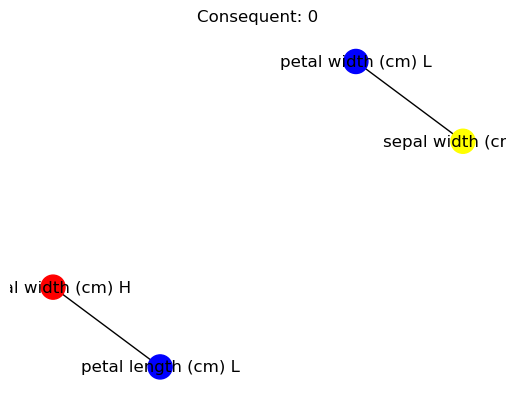

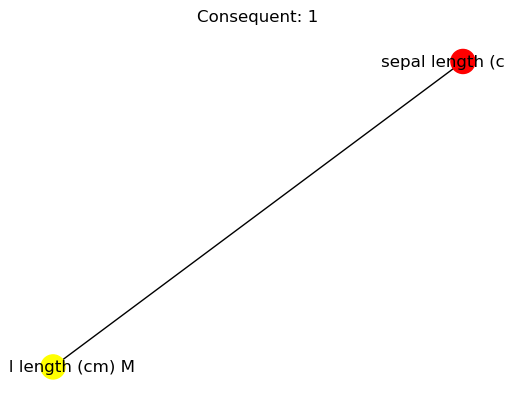

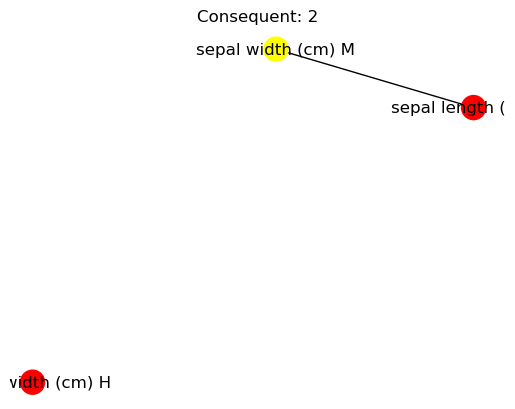

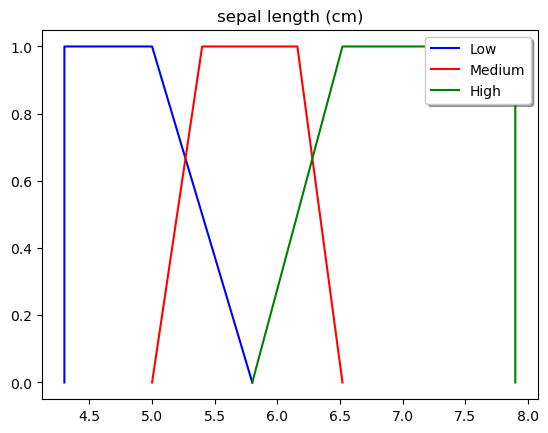

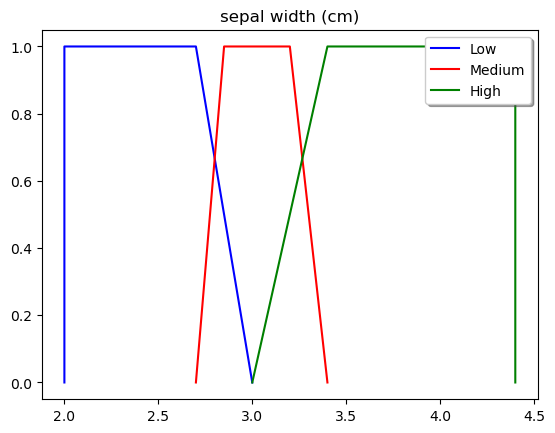

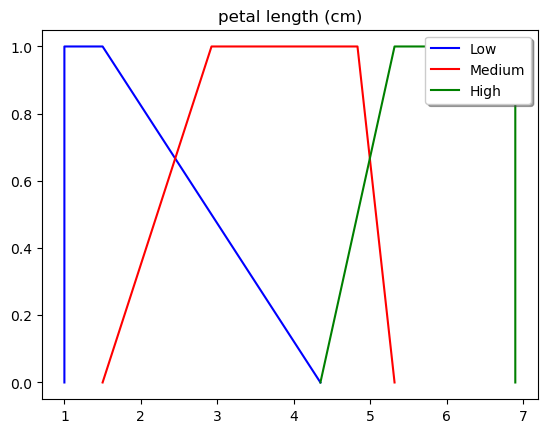

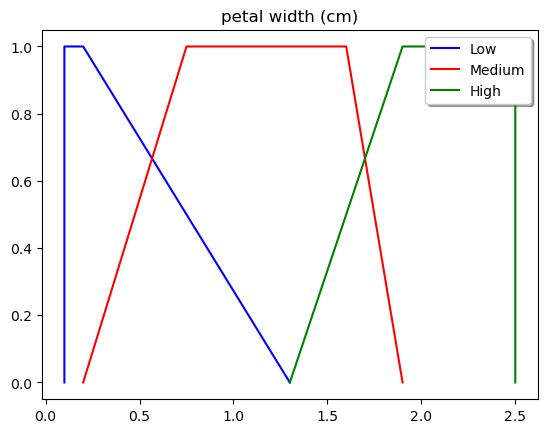

In [5]:
# Load rules from a plain text file
with open('iris_rules.txt', 'r') as f:
    str_rules = f.read()

# Persistence of the rules example
mrule_base = persistence.load_fuzzy_rules(str_rules, precomputed_partitions)

fl_classifier2 = GA.BaseFuzzyRulesClassifier(precomputed_rules=mrule_base)
# fl_classifier2.load_master_rule_base(mrule_base) # (Another possibility)

str_rules = eval_tools.eval_fuzzy_model(fl_classifier2, X_train, y_train, X_test, y_test, 
                        plot_rules=True, print_rules=True, plot_partitions=True, return_rules=True)